In [11]:
# Main imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Leitura do arquivo "aerogerador.dat"
df = pd.read_csv('aerogerador.dat', sep='\s+', header=None, names=['velocidade_vento', 'potencia_gerada'])
df

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_33314/3882870234.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('aerogerador.dat', sep='\s+', header=None, names=['velocidade_vento', 'potencia_gerada'])


,velocidade_vento,potencia_gerada
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0
...,...,...
2245,14.0,508
2246,14.0,508
2247,14.1,508
2248,14.3,508


Text(0.5, 1.0, 'Velocidade do Vento vs Potência Gerada')

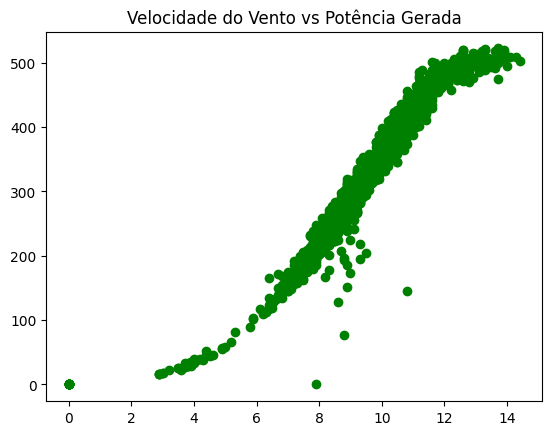

In [16]:
# Passo 1: Visualizando os dados em um grafico de espalhamento
plt.scatter(df['velocidade_vento'], df['potencia_gerada'], color='green')
plt.title('Velocidade do Vento vs Potência Gerada')

In [19]:
# Passo 2: Dividindo os dados em variáveis independentes e dependentes
X = df['velocidade_vento'].values
y = df['potencia_gerada'].values.reshape(-1, 1)

X.shape, y.shape

((2250,), (2250, 1))

In [20]:
# Passo 3: Definindo as rodadas de treinamento e teste
EPOCHS = 1000

In [21]:
# Passo 4: Definição dos metodos: MQO, MQO regularizado (Tikhonov) e media de valores observaveis
def MQO(X, y):
    theta_best = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    return theta_best

def MQO_regularizado(X, y, alpha= 1):
    theta_best = np.linalg.inv(X.T.dot(X) + alpha * np.eye(X.shape[1])).dot(X.T).dot(y)

    return theta_best
    
def media_valores_observaveis(y):
    return np.mean(y)

In [ ]:
# Passo 5: Encontrar o valor de alpha atraves do EQM
def EQM(y, y_pred):
    return np.mean((y - y_pred) ** 2)



In [27]:
# Passo 6: Embaralhar as amostras do modelo com proporção de 80% para treino e 20% para teste
from sklearn.model_selection import train_test_split

X = df.drop('potencia_gerada', axis=1).values
y = df['potencia_gerada'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test

(array([[ 8. ],
        [ 9.1],
        [12. ],
        ...,
        [ 8.9],
        [ 9.2],
        [ 8.5]]),
 array([[ 8.6],
        [ 8. ],
        [ 8.1],
        [ 7.6],
        [10.1],
        [10.1],
        [11.2],
        [ 8.1],
        [10.2],
        [ 9.4],
        [ 7.8],
        [ 9.5],
        [ 9.7],
        [11.7],
        [ 9.1],
        [ 9.9],
        [ 8.3],
        [12.2],
        [ 8.7],
        [ 9.8],
        [ 7.8],
        [ 8.2],
        [ 9.1],
        [ 9.2],
        [11.7],
        [11.1],
        [ 8.3],
        [ 7.8],
        [11.5],
        [ 7.8],
        [ 9.2],
        [ 8.6],
        [ 8.5],
        [ 8.6],
        [ 9. ],
        [ 8.3],
        [12. ],
        [10.4],
        [ 8.5],
        [10.1],
        [ 7.2],
        [11.4],
        [ 8.8],
        [ 7. ],
        [11.8],
        [12.6],
        [ 9.4],
        [ 9.3],
        [ 8. ],
        [10.7],
        [ 9.5],
        [ 6.9],
        [11.2],
        [12.2],
        [11.2],
        [

# 

In [ ]:
# Passo 7: Calcular o EQM a cada rodada de treinamento

